In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame (data= np.c_[iris['data'], iris['target']], columns= iris ['feature_names'] + ['target'])
df. head ()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
X = iris["data"][:, (2, 3)] 
y = iris ["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y [setosa_or_versicolor]

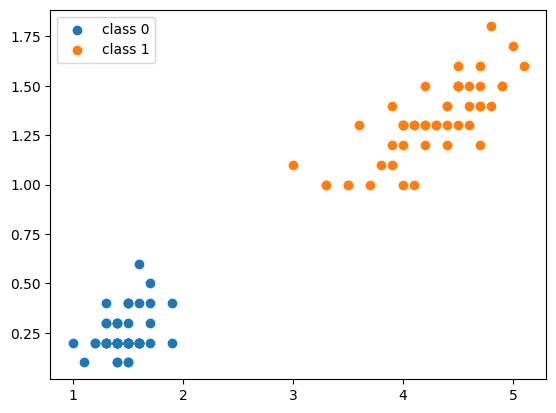

In [4]:
plt.scatter (X[:,0] [y==0], X[:,1] [y==0], label="class 0") 
plt.scatter (X[:,0][y==1],X[:,1][y==1],label="class 1") 
plt.legend () 
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.05, 0.1, 1, 10, 100]}  # Try 5 different C values
grid = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid.fit(X, y)

print("Best C:", grid.best_params_['C'])

Best C: 0.05


In [50]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1e5)
svm_clf.fit(X, y)

,C,100000.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [51]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Create a range of x values (horizontal axis)
    x_vals = np.linspace(xmin, xmax, 200)

    # Calculate corresponding y values for decision boundary
    decision_boundary = -w[0]/w[1] * x_vals - b/w[1]

    # Calculate margin lines
    margin = 1 / np.linalg.norm(w)
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # Plot decision boundary and margins
    plt.plot(x_vals, decision_boundary, "k-", linewidth=2, label="Decision boundary")
    plt.plot(x_vals, gutter_up, "k--", linewidth=1)
    plt.plot(x_vals, gutter_down, "k--", linewidth=1)

    # Highlight support vectors if available
    if hasattr(svm_clf, "support_vectors_"):
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='none', edgecolors='r', label="Support Vectors")


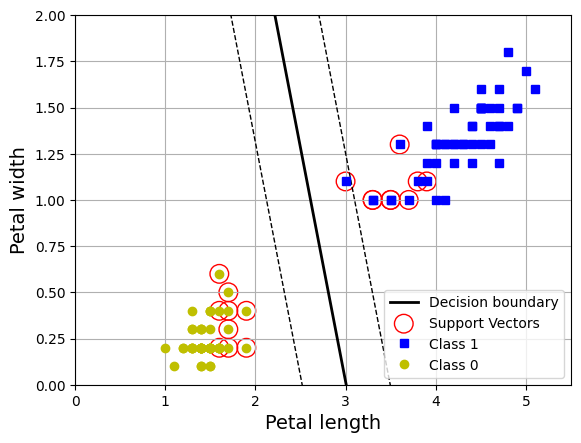

In [31]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)

plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Class 1")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Class 0")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.grid(True)
plt.show()

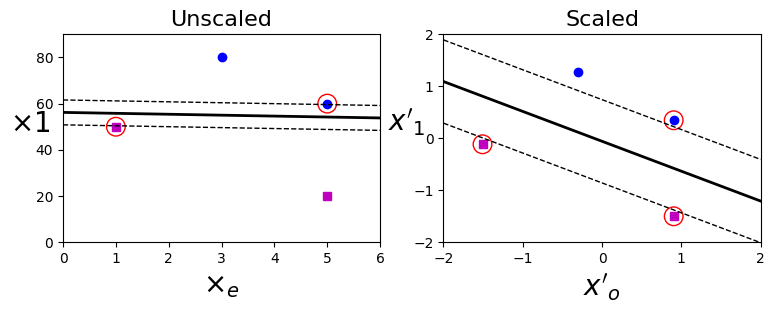

In [44]:
#Why Scaling is important
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]). astype (np. float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC (kernel="linear", C=100)
svm_clf.fit(Xs, ys)
plt.figure(figsize=(9,2.7))
plt.subplot (121)
plt.plot (Xs [:, 0][ys==1], Xs [:, 1] [ys==1], "bo") 
plt.plot(Xs[:, 0][ys==0], Xs [:, 1] [ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6) 
plt.xlabel("$×_e$", fontsize=20) 
plt.ylabel("$× 1$",fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16) 
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf. fit(X_scaled, ys)
plt.subplot (122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo") 
plt.plot (X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms") 
plot_svc_decision_boundary (svm_clf, -2, 2) 
plt.xlabel("$x'_o$", fontsize=20)
plt.ylabel("$x'_1$ ", fontsize=20, rotation=0) 
plt.title("Scaled", fontsize=16) 
plt.axis ([-2, 2, -2, 2]);

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

 Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.88      0.83      0.86        18

    accuracy                           0.88        40
   macro avg       0.88      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40



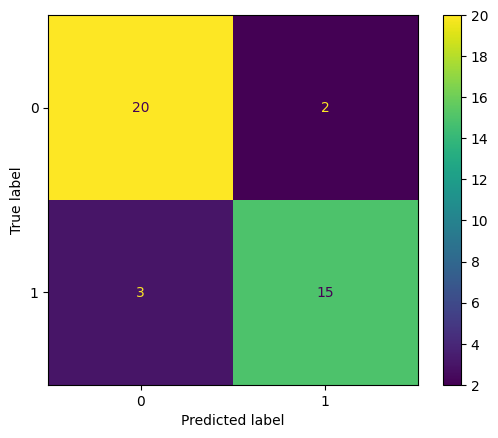

 Training Accuracy: 0.92
 Testing Accuracy : 0.88
 Cross-validation scores: [0.975 0.9   0.875 0.85  0.825]
Average CV Accuracy: 0.89


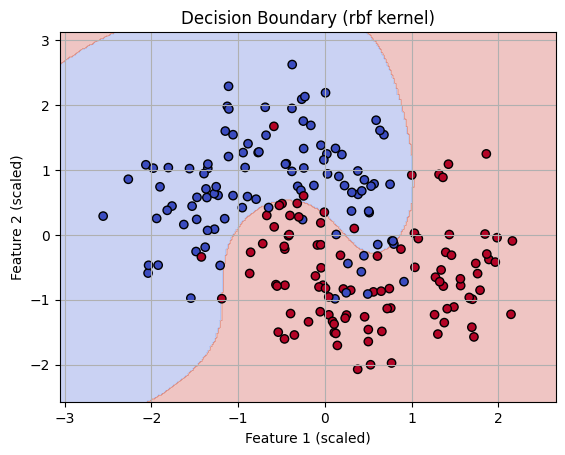

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 1. Create moons data (non-linear)
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)  # harder than noise=0.2

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_all_scaled = scaler.transform(X)

# 4. GridSearchCV for best hyperparameters
param_grid = {
    'kernel': ['rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]  # relevant for poly
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# 5. Evaluate on test set
y_pred = best_model.predict(X_test_scaled)

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test)
plt.grid(False)
plt.show()

# 6. Accuracy scores
train_acc = best_model.score(X_train_scaled, y_train)
test_acc = best_model.score(X_test_scaled, y_test)
print(f" Training Accuracy: {train_acc:.2f}")
print(f" Testing Accuracy : {test_acc:.2f}")

# 7. Cross-validation accuracy
cv_scores = cross_val_score(best_model, X_all_scaled, y, cv=5)
print(f" Cross-validation scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean():.2f}")

# 8. Decision boundary plotting
def plot_decision_boundary(clf, X_scaled, y):
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid_points).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")
    plt.title(f"Decision Boundary ({clf.kernel} kernel)")
    plt.grid(True)
    plt.show()

plot_decision_boundary(best_model, X_all_scaled, y)


Best Parameters: {'gamma': 0.01}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



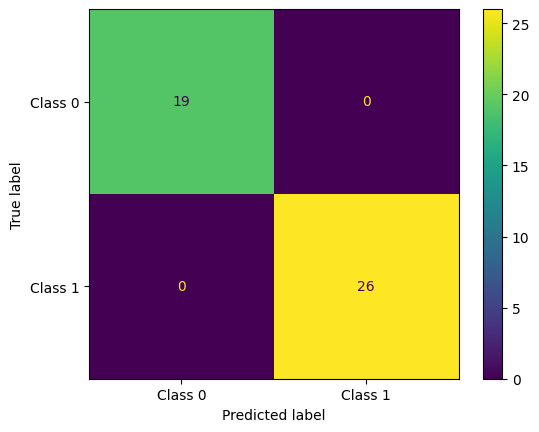

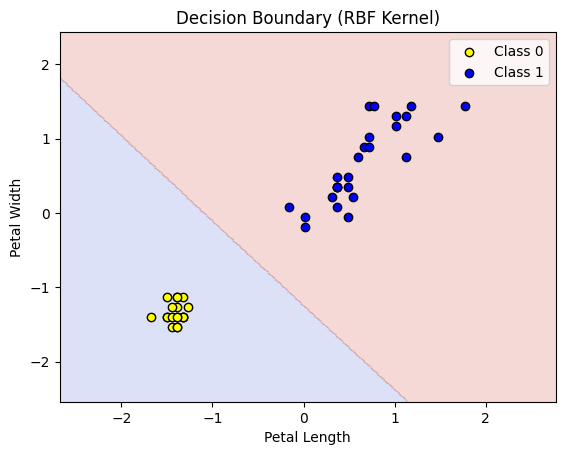

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load data (Iris, 2 classes and 2 features)
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Petal length and petal width
y = (iris.target == 1) | (iris.target == 2)  # Class 1 and 2 only (label as 0 and 1)
y = y.astype(int)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Hyperparameter tuning with GridSearchCV
param_grid = {
    'gamma': [0.01, 0.1, 1]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

# Step 5: Best model
best_model = grid.best_estimator_

# Step 6: Evaluation on test set
y_pred = best_model.predict(X_test_scaled)

print("Best Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.grid(False)
plt.show()

# Step 8: Decision Boundary Plot (only for 2 features)
def plot_decision_boundary(clf, X, y):
    x0s = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 300)
    x1s = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 300)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred_grid = clf.predict(X_grid).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred_grid, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], color='yellow', edgecolor='k', label='Class 0')
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], color='blue', edgecolor='k', label='Class 1')
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()
    plt.title("Decision Boundary (RBF Kernel)")
    plt.show()

# Plot using test set
plot_decision_boundary(best_model, X_test_scaled, y_test)
